# Plotting of regerssion runs

Use this notebook to get the MSE-Iterations plots of a collection of runs.

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

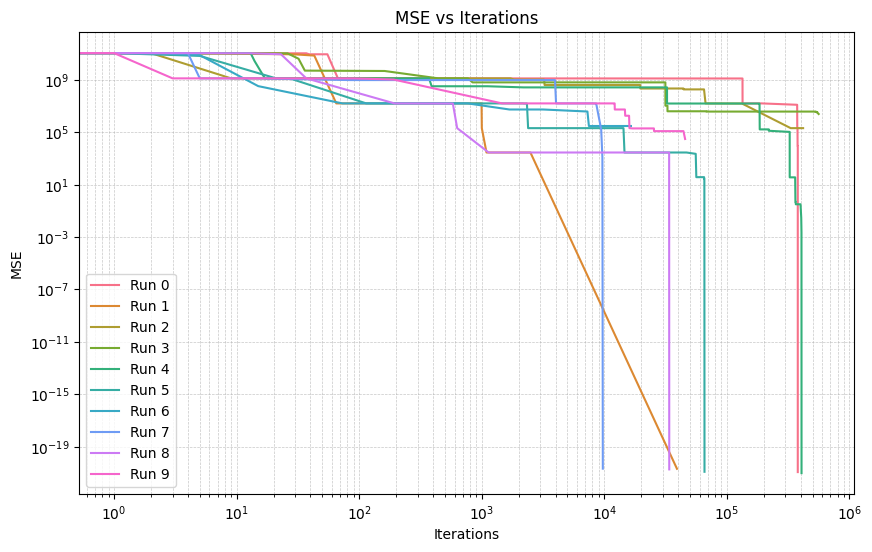

In [ ]:
runs_path = "saved_results/mse_ng_035/nguyen4/"

palette = sns.color_palette("husl", n_colors=10)
plt.figure(figsize=(10, 6))

i=0
for filename in os.listdir(runs_path):
  if filename.startswith("mse_run"):
    x_values = []
    y_values = []

    with open(os.path.join(runs_path, filename), "r") as f:
      lines = f.readlines()

      for line in lines:
        if not line.startswith(("best", "target")):
          iterations = int(line.split(" || ")[1])
          error = float(line.split(" || ")[2])
          x_values.append(iterations)
          y_values.append(error)

    sns.lineplot(x=x_values, y=y_values, label=f"Run {i}", color=palette[i])
    i += 1

plt.xscale('log')
plt.yscale('log')
plt.title("MSE vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()